In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\yashvardhan_Jadhav\AppData\Local\Temp\ipykernel_20584\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("50_Startups.csv")

In [4]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.describe()

,RnD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.isnull().sum()

RnD               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.isna().sum()

RnD               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

In [9]:
df.columns

Index(['RnD', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

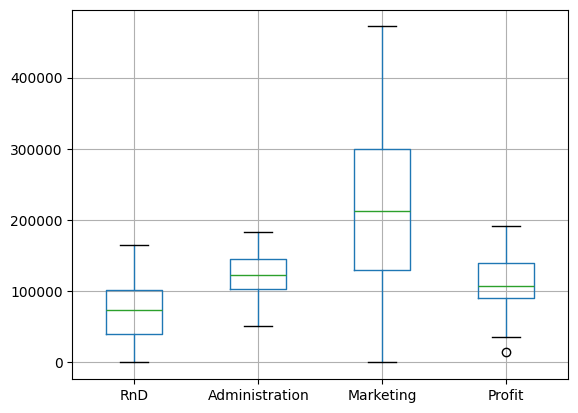

In [10]:

df2 = pd.DataFrame(df, columns = ['RnD', 'Administration', 'Marketing', 'Profit'])
df2.boxplot()
plt.show()

In [11]:
q1 = df['RnD'].quantile(0.25)
q3 = df['RnD'].quantile(0.75)

IQR = q3-q1
threshold = 1.5
outliers = df[(df['RnD'] < q1 - threshold * IQR) | (df['RnD'] > q3 + threshold * IQR)]


In [12]:
outliers

,RnD,Administration,Marketing,State,Profit


In [27]:
def outliers(column,threshold):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    IQR = q3-q1

    outliers = df[(df[column] < q1 - threshold * IQR) | (df[column] > q3 + threshold * IQR)]
    return outliers

In [28]:
outlier = outliers('Profit',1.5)

In [29]:
df = df.drop(outlier.index)

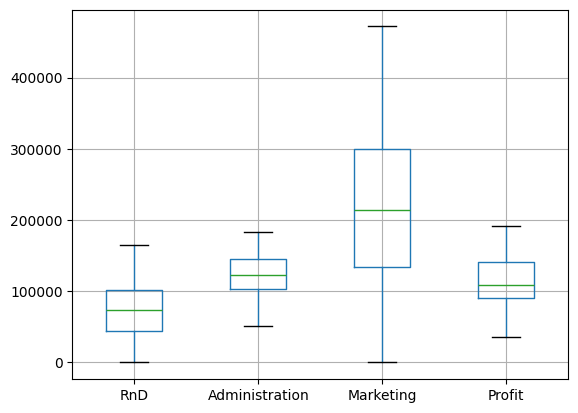

In [30]:
df2 = pd.DataFrame(df, columns = ['RnD', 'Administration', 'Marketing', 'Profit'])
df2.boxplot()
plt.show()

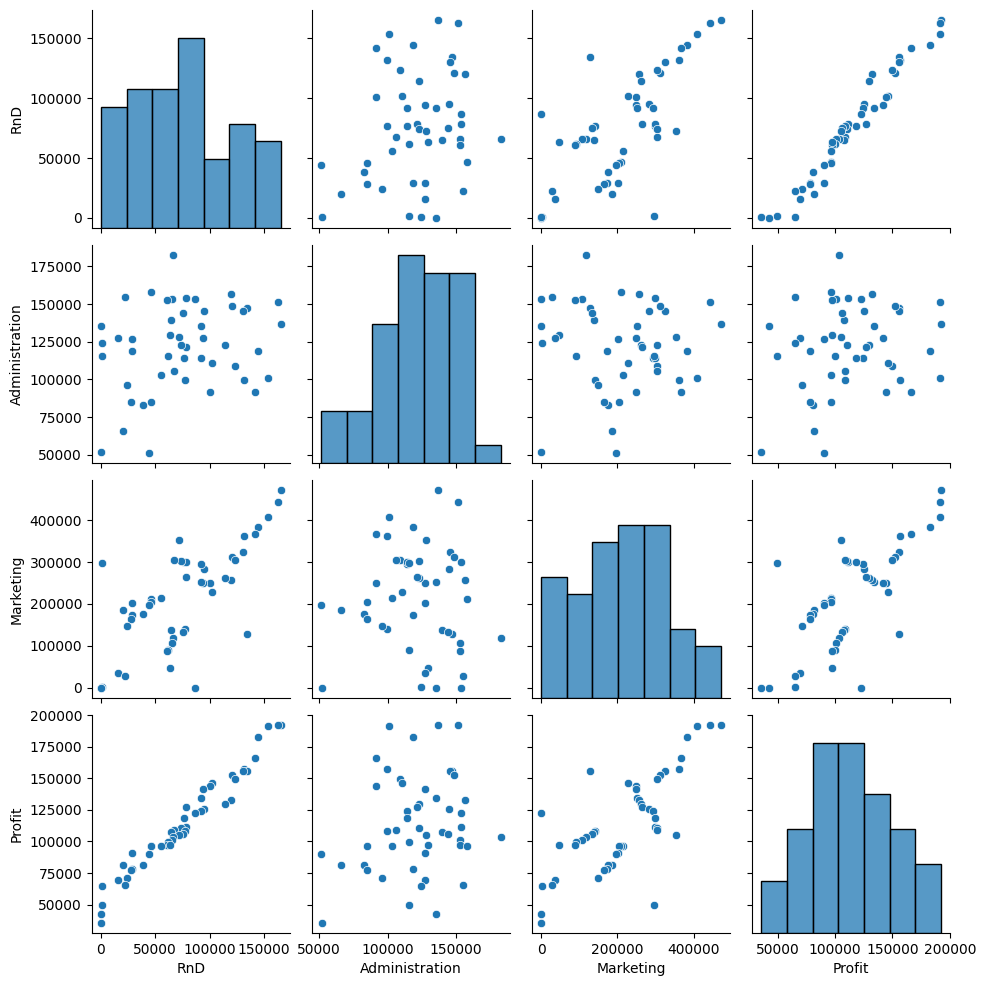

In [31]:
sns.pairplot(df)
plt.show()

In [32]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
df.groupby('State').count()

,RnD,Administration,Marketing,Profit
State,,,,
California,16,16,16,16
Florida,16,16,16,16
New York,17,17,17,17


In [34]:
df.groupby('State')['Profit'].sum()

State
California    1751706.58
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

In [35]:
df.groupby('State')['Profit'].mean()

State
California    109481.661250
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

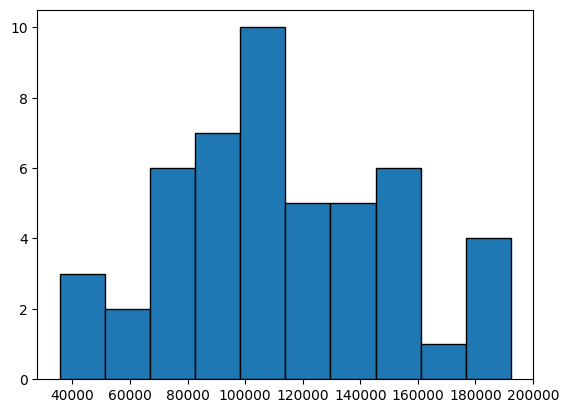

In [36]:
# hist_data = df['Profit','State']
df['Profit'].hist(bins=10,edgecolor='black',grid=False) 
plt.show()

In [37]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
avg_values = df.groupby('State')[['RnD','Administration','Marketing']].mean()
avg_values

,RnD,Administration,Marketing
State,,,
California,68698.778750,120981.676250,191126.421250
Florida,80724.016250,121768.897500,247323.551250
New York,76195.062353,121543.470588,205346.015882


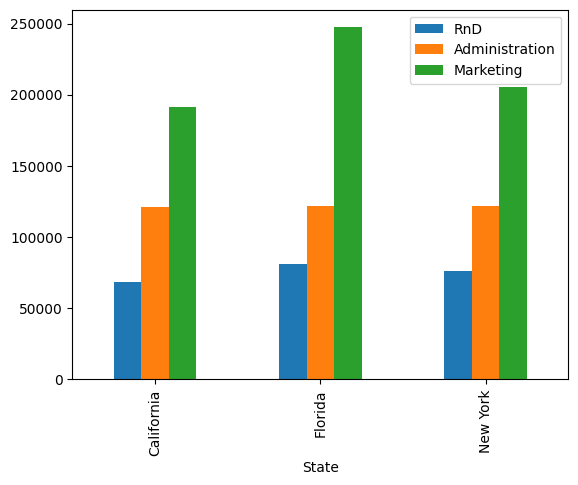

In [39]:
avg_values.plot.bar()
plt.show()

In [40]:
corr_value = df2.corr()
corr_value


,RnD,Administration,Marketing,Profit
RnD,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


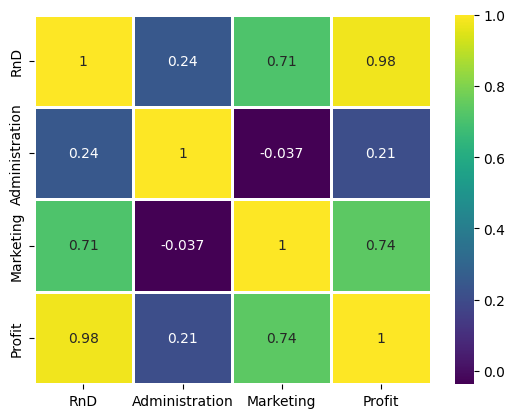

In [41]:
sns.heatmap(corr_value,annot=True,cmap='viridis',linewidths=1)
plt.show()